<a href="https://colab.research.google.com/github/romainledoux/Galaxy_classification/blob/master/Galaxy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import os, glob
import numpy as np
from astropy.io import fits
import astropy
import matplotlib.pyplot as plt


In [2]:
# Initialisation of a list containing images 
# And of a list to contain the morphologic types
raw_data = []
morph_type = []

# Path to the data
directory = "C:/Users/romai/Documents/Data_Science/Galaxy_project/AstrophysicML/data/"
images_path = os.path.join(directory, 'image/')
new_images_path = os.path.join(directory, 'new_image')
catalog_path = os.path.join(directory, 'data-COSMOS-10000-id.txt')

# Data loading
ids, mod = np.loadtxt(catalog_path, unpack=True, usecols=(0, 3))

for one in os.listdir(images_path):
    idi = int(one.split('_')[0])
    modi = mod[ids==idi][0]
    if modi > 0:
        raw_data.append(fits.open(os.path.join(images_path, one))[0].data)
        morph_type.append(modi)
        
raw_data = np.asarray(raw_data)
morph_type = np.asarray(morph_type)
        


OSError: ignored

In [0]:
# fits.open(os.path.join(images_path, '0001_149.4915009_2.493024_acs_I_mosaic_30mas_sci.fits')).info()

In [0]:
#with fits.open(os.path.join(images_path, '0001_149.4915009_2.493024_acs_I_mosaic_30mas_sci.fits')) as hdul:  # open a FITS file
#    data = hdul # assume the first extension is an image

In [0]:
#fits.open(os.path.join(images_path, '0001_149.4915009_2.493024_acs_I_mosaic_30mas_sci.fits'))[0].data

In [0]:
#from astropy.io import fits
#fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

#with fits.open(fits_image_filename) as hdul:  # open a FITS file
#    data = hdul[1]  # assume the first extension is an image

In [0]:
#np.asarray(data)

array(<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000208EB490400>,
      dtype=object)

In [0]:
#plt.imshow(np.asarray(data))

In [0]:
raw_data.shape

(3992, 101, 101)

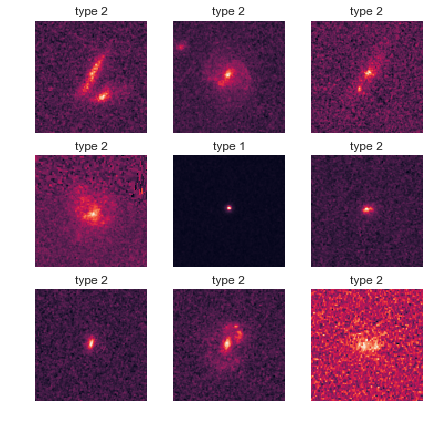

In [0]:
fig = plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(raw_data[i])
    plt.title('type %d' % (morph_type[i]))
    plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Galaxies type frequency distribution')

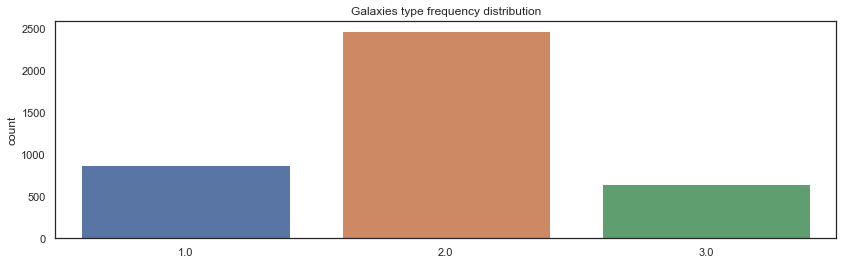

In [0]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
plt.figure(figsize=(14,4))
digits_freq = sns.countplot(morph_type)
plt.title("Galaxies type frequency distribution")

In [0]:
raw_data[1][1]

array([ 4.14397102e-04, -3.96288559e-03, -3.09296977e-03, -2.24242313e-03,
       -4.56564873e-03, -8.57476052e-03, -2.50896951e-03, -3.81075632e-04,
       -1.79690972e-03, -7.41977303e-04,  2.65374430e-03, -1.02140522e-03,
        2.03311956e-03,  1.01637444e-03, -3.17881140e-03,  2.73401471e-04,
        2.70469417e-03,  4.68980428e-03, -5.49863398e-06,  2.53983168e-03,
        1.09741034e-03, -3.05944332e-03,  2.70847158e-05,  3.30592133e-03,
        1.45998166e-03,  2.27411627e-03,  8.15998705e-04,  1.89789478e-03,
        9.85018793e-04,  3.35627003e-03,  2.30460893e-03,  2.30613659e-04,
       -3.82313883e-04, -3.85663868e-03, -3.45696323e-03, -6.91533030e-04,
       -1.80498301e-03, -4.88318969e-03, -3.16515041e-04,  2.08034157e-03,
       -2.48378201e-04, -2.01750291e-03,  2.16952153e-03,  1.58291089e-03,
        1.46519131e-04, -1.85222540e-03, -1.21523882e-03,  6.76926866e-04,
       -1.97809073e-03, -2.11446942e-03,  2.01292220e-04, -5.38832089e-03,
       -6.12638611e-03, -

In [0]:
# Images normalisation
images = np.asarray([img - img.mean() / img.std() for img in raw_data])
# Reshape of the images' shape in a 1D shape (to be passed as input in machine learning model)
images = images.reshape(images.shape[0], - 1)

In [0]:
print(images.shape)
print(raw_data.shape)
print(images.mean())

(3992, 10201)
(3992, 101, 101)
-0.21024447739549734


In [0]:
print(max(raw_data[1].any()))

TypeError: 'numpy.bool_' object is not iterable

In [0]:
images[5]

array([-0.10475821, -0.10515559, -0.1069796 , ..., -0.10724397,
       -0.11069996, -0.10882982])

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images, morph_type, test_size=0.3, random_state = 42)

In [0]:


svm = svm.SVC()

parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [1, 5, 10, 20 ]}
grid_svm = GridSearchCV(svm, parameters, n_jobs=8)
grid_svm.fit(X_train, y_train)
grid_svm_pred = grid_svm.best_estimator_.predict(X_test)



Best classifier
: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


NameError: name 'svm_pred' is not defined

In [0]:
print("Best classifier\n:", grid_svm.best_estimator_)
print("Precision, sensibility, F-score\n", metrics.classification_report(y_test, grid_svm_pred))
print("Confusion Matrix\n", metrics.confusion_matrix(y_test, svm_pred))

Best classifier
: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Precision, sensibility, F-score
               precision    recall  f1-score   support

         1.0       0.93      0.71      0.80       253
         2.0       0.73      0.98      0.84       747
         3.0       0.00      0.00      0.00       198

   micro avg       0.76      0.76      0.76      1198
   macro avg       0.55      0.56      0.55      1198
weighted avg       0.65      0.76      0.69      1198



C:\Users\romai\Anaconda3\envs\fastai\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NameError: name 'svm_pred' is not defined

In [0]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Precision, sensibility, F-score\n", metrics.classification_report(y_test, rfc_pred))
print("Confusion Matrix\n", metrics.confusion_matrix(y_test, rfc_pred))

NameError: name 'rf_pred' is not defined

In [0]:
print("Precision, sensibility, F-score\n", metrics.classification_report(y_test, rfc_pred))
print("Confusion Matrix\n", metrics.confusion_matrix(y_test, rfc_pred))

Precision, sensibility, F-score
               precision    recall  f1-score   support

         1.0       0.93      0.70      0.80       253
         2.0       0.73      0.97      0.84       747
         3.0       0.38      0.03      0.05       198

   micro avg       0.76      0.76      0.76      1198
   macro avg       0.68      0.57      0.56      1198
weighted avg       0.72      0.76      0.70      1198

Confusion Matrix
 [[178  73   2]
 [ 14 727   6]
 [  0 193   5]]


## CNN

In [0]:
from sklearn import preprocessing
import keras

# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(raw_data)
#scaled_df = pd.DataFrame(scaled_df, columns=names)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [0]:
from keras import backend as K
import keras
K.tensorflow_backend._get_available_gpus()

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10927446900511314754
]


In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  
 
# Do other imports now...
import keras

In [0]:
# Images normalisation
scaled_data = np.asarray([(img - img.mean()) / img.std() for img in raw_data])

In [0]:



n_test = int(0.33 * raw_data.shape[0])
n_train = raw_data.shape[0] - n_test
X_train = raw_data[:n_train]
y_train = morph_type[:n_train]
X_test = raw_data[n_train:]
y_test = morph_type[n_train:]

In [0]:
def img_reshape(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, data.shape[1], data.data.shape[2])
        input_shape = (1, data.shape[1], data.shape[2])
    else:
        data = data.reshape(data.shape[0], data.shape[1], data.data.shape[2], 1)  
        input_shape = (data.shape[1], data.shape[2], 1)
    return data

X_train = img_reshape(X_train)
X_test = img_reshape(X_test)

In [0]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(101, 101, 1)

In [0]:
y_train.shape


(2675, 3)

In [0]:
# One-Hot-Encoding
num_classes = 3
y_train = keras.utils.to_categorical(y_train-1, num_classes)
y_test = keras.utils.to_categorical(y_test-1, num_classes)

In [0]:
X_train.shape

(2675, 101, 101, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
print("X_train shape :", X_train.shape, "\n",
     "y_train shape :", y_train.shape, "\n",
     "X_test shape :", X_test.shape, "\n",
     "y_test shape : ", y_test.shape)

X_train shape : (2675, 101, 101, 1) 
 y_train shape : (2675, 3) 
 X_test shape : (1317, 101, 101, 1) 
 y_test shape :  (1317, 3)


In [0]:
batch_size=20
epochs = 50

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 2675 samples, validate on 1317 samples
Epoch 1/50
2675/2675 [==============================] - 61s 23ms/step - loss: 0.5785 - acc: 0.7716 - val_loss: 0.6655 - val_acc: 0.7449
Epoch 2/50
2675/2675 [==============================] - 35s 13ms/step - loss: 0.5832 - acc: 0.7735 - val_loss: 0.5892 - val_acc: 0.7669
Epoch 3/50
2675/2675 [==============================] - 37s 14ms/step - loss: 0.5594 - acc: 0.7865 - val_loss: 0.5947 - val_acc: 0.7639
Epoch 4/50
2675/2675 [==============================] - 37s 14ms/step - loss: 0.5530 - acc: 0.7809 - val_loss: 0.5952 - val_acc: 0.7654
Epoch 5/50
2675/2675 [==============================] - 35s 13ms/step - loss: 0.5377 - acc: 0.7843 - val_loss: 0.5879 - val_acc: 0.7563
Epoch 6/50
2675/2675 [==============================] - 34s 13ms/step - loss: 0.5311 - acc: 0.7925 - val_loss: 0.6030 - val_acc: 0.7563
Epoch 7/50
2675/2675 [==============================] - 39s 14ms/step - loss: 0.5550 - acc: 0.7813 - val_loss: 0.5820 - val_acc: 0.7646


KeyboardInterrupt: 